<a href="https://colab.research.google.com/github/prog815/portfOptim/blob/master/%D0%9E%D0%BF%D1%82%D0%B8%D0%BC%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F_%D1%81%D0%BE%D1%81%D1%82%D0%B0%D0%B2%D0%B0_%D0%BF%D0%BE%D1%80%D1%82%D1%84%D0%B5%D0%BB%D1%8F_%D0%B4%D0%BB%D1%8F_MOEX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Оптимизация состава портфеля для MOEX

Проект "Оптимизация инвестиционного портфеля".

https://github.com/prog815/portfOptim

Енин А.В.

Оренбург - 2020

20.09.2020

Добавляем в оптимизацию выбор бумаг. Надеемся оптимизация оставит только нужные бумаги и поднимет коэффициент.

In [1]:
ticks="""TGKA.ME
VTBR.ME
HYDR.ME
TGKD.ME
MRKV.ME
MRKZ.ME
TGKDP.ME
MRKC.ME
NMTP.ME
NLMK.ME
MTLR.ME
AFLT.ME
FESH.ME
TRMK.ME
RTKM.ME
AMEZ.ME
DVEC.ME
RASP.ME
RTKMP.ME
LSNG.ME
BSPB.ME
NKNCP.ME
LSNGP.ME
KMAZ.ME
CHEP.ME
MRKK.ME
KUBE.ME
ROSB.ME""".split()
print(ticks)

['TGKA.ME', 'VTBR.ME', 'HYDR.ME', 'TGKD.ME', 'MRKV.ME', 'MRKZ.ME', 'TGKDP.ME', 'MRKC.ME', 'NMTP.ME', 'NLMK.ME', 'MTLR.ME', 'AFLT.ME', 'FESH.ME', 'TRMK.ME', 'RTKM.ME', 'AMEZ.ME', 'DVEC.ME', 'RASP.ME', 'RTKMP.ME', 'LSNG.ME', 'BSPB.ME', 'NKNCP.ME', 'LSNGP.ME', 'KMAZ.ME', 'CHEP.ME', 'MRKK.ME', 'KUBE.ME', 'ROSB.ME']


# Подгружаем библиотеку анализа портфеля

In [3]:
!pip install bt

     |████████████████████████████████| 2.7MB 2.9MB/s 
  Created wheel for bt: filename=bt-0.2.7-cp36-cp36m-linux_x86_64.whl size=533280 sha256=837c97e2dbe37daa7b1cfddaef3eb0de3e8ffce0e746de1a62351ade82566ef0
  Stored in directory: /root/.cache/pip/wheels/ae/8a/a2/a679757e4e7219e6f17727d1422d4ce32da847678c6559da35
  Created wheel for ffn: filename=ffn-0.3.4-cp36-none-any.whl size=22813 sha256=eea3dd545c3d6d35e106a356e698fd408953c42912b5ea3aad500602c1256ceb
  Stored in directory: /root/.cache/pip/wheels/20/08/4d/921180e81279d147cb6399fe1e194f2c67a796df86f9f4c5fe
Successfully built bt ffn


In [4]:
import bt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/ffn/core.py:27: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)
/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


# Подгружаем историю данных

In [5]:
data = bt.get(ticks, start='2010-01-01')

In [6]:
data

,tgkame,vtbrme,hydrme,tgkdme,mrkvme,mrkzme,tgkdpme,mrkcme,nmtpme,nlmkme,mtlrme,afltme,feshme,trmkme,rtkmme,amezme,dvecme,raspme,rtkmpme,lsngme,bspbme,nkncpme,lsngpme,kmazme,chepme,mrkkme,kubeme,rosbme
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-03-03,0.014108,0.056000,0.851060,0.011600,-0.396597,0.198611,0.005556,0.549784,1.890153,45.245136,682.319519,37.158562,9.40,92.702675,82.227699,12.800,0.878,161.063995,30.512236,24.167328,82.698944,1.945989,11.003892,72.700180,47.446537,120.942375,124.124344,118.975998
2010-03-04,0.014727,0.056074,0.854301,0.012100,-0.406614,0.208310,0.005732,0.550893,1.896474,44.932461,675.628540,36.956253,9.31,92.154686,82.574821,12.300,0.885,164.630859,30.243368,24.009184,83.526543,1.973754,11.007599,73.600899,47.146908,120.560188,124.208542,118.843002
2010-03-05,0.014658,0.056661,0.862079,0.012100,-0.422265,0.212023,0.005909,0.542579,1.925132,46.295177,690.834473,37.124844,9.34,93.072403,82.569145,12.648,0.898,173.246048,30.306385,24.734207,84.796074,1.946592,11.189351,74.648659,47.523190,118.936348,124.781181,117.206001
2010-03-09,0.015140,0.057456,0.874395,0.012100,-0.418821,0.208462,0.006526,0.556989,1.897739,48.063919,696.495422,36.733704,9.40,90.550316,84.099884,12.650,0.890,176.034729,31.192808,24.329523,85.478523,1.959872,11.148137,73.545746,47.453503,118.346596,125.050644,116.359001
2010-03-10,0.016035,0.057025,0.889303,0.013100,-0.409118,0.206643,0.006834,0.555326,1.959690,47.060547,687.999390,36.659519,9.28,91.580276,84.555115,12.920,0.895,173.801941,30.970146,24.613371,85.559258,1.952628,11.148137,72.415260,47.007538,118.240189,129.682144,121.832001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-14,0.011600,0.035700,0.743600,0.003440,0.070100,0.049000,0.004120,0.297000,8.610000,166.559998,62.910000,82.080002,8.12,58.340000,95.410004,4.665,0.913,115.199997,86.699997,5.910000,43.000000,77.800003,150.399994,62.500000,210.000000,25.340000,74.900002,81.000000
2020-09-15,0.011640,0.036110,0.751900,0.003510,0.070000,0.049150,0.004160,0.299000,8.685000,168.800003,64.739998,82.360001,8.14,60.860001,96.239998,4.840,0.916,119.500000,87.300003,5.900000,43.299999,79.599998,152.350006,62.900002,209.500000,25.639999,75.300003,80.800003
2020-09-16,0.011520,0.035850,0.748000,0.003600,0.068850,0.049100,0.004470,0.302200,8.625000,167.539993,63.110001,82.760002,8.65,60.820000,97.120003,4.780,0.911,118.199997,87.449997,5.790000,43.560001,79.940002,153.600006,62.700001,211.000000,25.260000,74.599998,79.199997


# Поиск параметров портфеля в генетике

## Подгружаем библиотеку генетики

In [7]:
! pip install git+https://github.com/prog815/progGA

  Cloning https://github.com/prog815/progGA to /tmp/pip-req-build-ln6__liz
  Running command git clone -q https://github.com/prog815/progGA /tmp/pip-req-build-ln6__liz
  Created wheel for progGA: filename=progGA-0.0.7-cp36-none-any.whl size=3627 sha256=188db654e9b5f6c5ac200b4c3800931cfd36ecc87c6a247a6c140a48775aac08
  Stored in directory: /tmp/pip-ephem-wheel-cache-y61xt78p/wheels/9c/7a/cc/d1ffa9ccaa42befda21d63d0e01c942a0add5854c37e0bd2ff
Successfully built progGA


In [8]:
from progGA import ListGenetic

## Функция расчета качества

In [35]:
def getQualityMethod(lookback,testlen,**kwargs):
    
    clms = []

    for tick,flag in kwargs.items():
        if flag:
            clms.append(tick)

    if len(clms) <= 0:
        return 0.

    s = bt.Strategy('s', [bt.algos.RunEveryNPeriods(testlen,offset=lookback),
                          bt.algos.SelectAll(),
                          bt.algos.WeighMeanVar(lookback=pd.DateOffset(days=lookback)),
                          bt.algos.Rebalance()])
    
    test = bt.Backtest(s, data[clms], progress_bar=False)
    res = bt.run(test)
    q = res[0].daily_sharpe
    
    return q,res

## Создаем модель

In [30]:
tickArgs = {tick:[False,True] for tick in data.columns}

modelGA = ListGenetic(pop_size=100,
                      lookback=range(50,400,10),
                      testlen=range(20,300),
                      **tickArgs,
                      quality_method=getQualityMethod)

In [31]:
modelGA.fit(1000)

1 {'quality': -0.19290357660518298, 'lookback': 210, 'testlen': 224, 'tgkame': True, 'vtbrme': True, 'hydrme': True, 'tgkdme': False, 'mrkvme': True, 'mrkzme': False, 'tgkdpme': False, 'mrkcme': True, 'nmtpme': False, 'nlmkme': False, 'mtlrme': True, 'afltme': False, 'feshme': False, 'trmkme': True, 'rtkmme': False, 'amezme': True, 'dvecme': False, 'raspme': True, 'rtkmpme': True, 'lsngme': True, 'bspbme': True, 'nkncpme': False, 'lsngpme': False, 'kmazme': True, 'chepme': True, 'mrkkme': True, 'kubeme': False, 'rosbme': True}
2 {'quality': -0.21041813823032623, 'lookback': 370, 'testlen': 295, 'tgkame': False, 'vtbrme': False, 'hydrme': False, 'tgkdme': False, 'mrkvme': False, 'mrkzme': False, 'tgkdpme': True, 'mrkcme': False, 'nmtpme': False, 'nlmkme': False, 'mtlrme': True, 'afltme': True, 'feshme': True, 'trmkme': True, 'rtkmme': False, 'amezme': False, 'dvecme': True, 'raspme': False, 'rtkmpme': False, 'lsngme': True, 'bspbme': True, 'nkncpme': False, 'lsngpme': False, 'kmazme': F

/usr/local/lib/python3.6/dist-packages/ffn/core.py:2056: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)


310 {'quality': 0.8240747629975765, 'lookback': 120, 'testlen': 223, 'tgkame': True, 'vtbrme': False, 'hydrme': True, 'tgkdme': False, 'mrkvme': True, 'mrkzme': False, 'tgkdpme': False, 'mrkcme': False, 'nmtpme': True, 'nlmkme': True, 'mtlrme': False, 'afltme': False, 'feshme': False, 'trmkme': False, 'rtkmme': True, 'amezme': False, 'dvecme': True, 'raspme': True, 'rtkmpme': True, 'lsngme': False, 'bspbme': False, 'nkncpme': True, 'lsngpme': False, 'kmazme': False, 'chepme': False, 'mrkkme': False, 'kubeme': False, 'rosbme': False}
311 {'quality': 0.942831254914477, 'lookback': 130, 'testlen': 34, 'tgkame': True, 'vtbrme': True, 'hydrme': False, 'tgkdme': True, 'mrkvme': True, 'mrkzme': False, 'tgkdpme': False, 'mrkcme': True, 'nmtpme': False, 'nlmkme': True, 'mtlrme': False, 'afltme': True, 'feshme': False, 'trmkme': False, 'rtkmme': True, 'amezme': False, 'dvecme': True, 'raspme': True, 'rtkmpme': False, 'lsngme': False, 'bspbme': False, 'nkncpme': True, 'lsngpme': False, 'kmazme': 

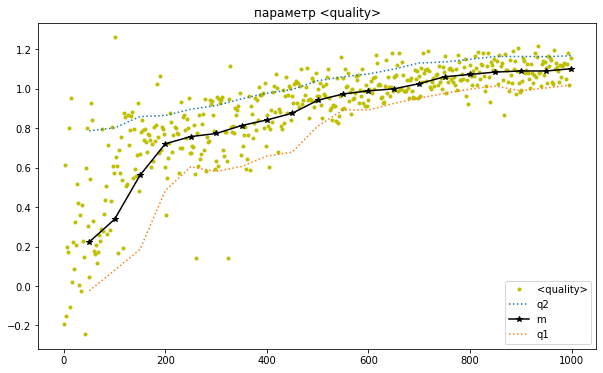

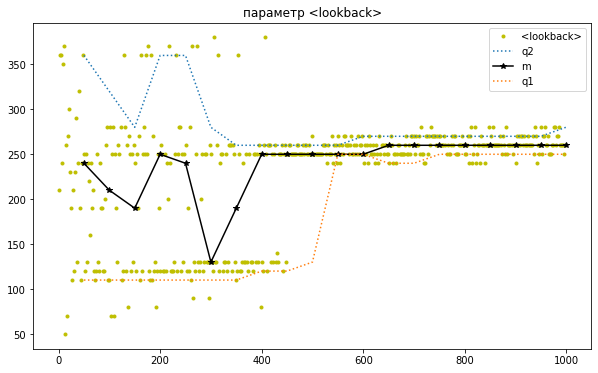

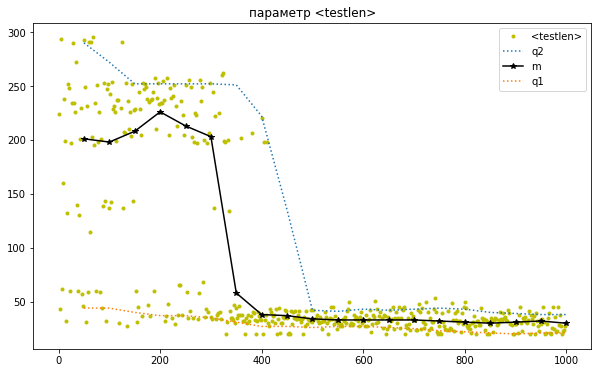

In [32]:
modelGA.plot_hist_new(('quality','lookback','testlen'))

## Лучшая на оптимизации

In [37]:
bestPar = modelGA.getBestParams()
bestPar

{'afltme': True,
 'amezme': False,
 'bspbme': False,
 'chepme': False,
 'dvecme': True,
 'feshme': False,
 'hydrme': False,
 'kmazme': False,
 'kubeme': False,
 'lookback': 270,
 'lsngme': False,
 'lsngpme': True,
 'mrkcme': False,
 'mrkkme': False,
 'mrkvme': True,
 'mrkzme': False,
 'mtlrme': True,
 'nkncpme': True,
 'nlmkme': True,
 'nmtpme': False,
 'raspme': False,
 'rosbme': False,
 'rtkmme': True,
 'rtkmpme': False,
 'testlen': 30,
 'tgkame': True,
 'tgkdme': True,
 'tgkdpme': False,
 'trmkme': False,
 'vtbrme': False}

In [40]:
_,res_best = getQualityMethod(**bestPar)

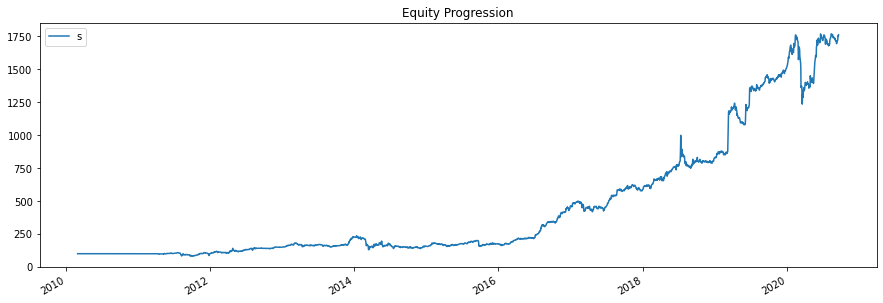

In [41]:
res_best.plot()

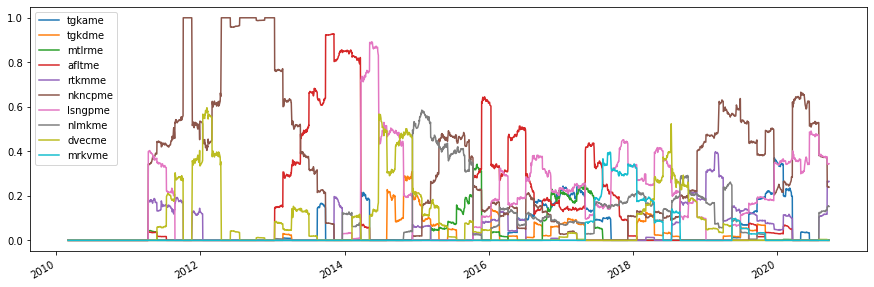

In [42]:
res_best.plot_security_weights()

In [43]:
res_best.display()

Stat                 s
-------------------  ----------
Start                2010-03-02
End                  2020-09-18
Risk-free rate       0.00%

Total Return         1662.35%
Daily Sharpe         1.10
Daily Sortino        1.84
CAGR                 31.26%
Max Drawdown         -44.82%
Calmar Ratio         0.70

MTD                  2.08%
3m                   2.92%
6m                   42.59%
YTD                  16.70%
1Y                   21.87%
3Y (ann.)            44.96%
5Y (ann.)            54.53%
10Y (ann.)           33.25%
Since Incep. (ann.)  31.26%

Daily Sharpe         1.10
Daily Sortino        1.84
Daily Mean (ann.)    31.75%
Daily Vol (ann.)     28.96%
Daily Skew           1.90
Daily Kurt           51.45
Best Day             32.90%
Worst Day            -17.33%

Monthly Sharpe       1.07
Monthly Sortino      2.54
Monthly Mean (ann.)  31.71%
Monthly Vol (ann.)   29.56%
Monthly Skew         0.98
Monthly Kurt         3.07
Best Month           37.54%
Worst Month          -18.42%


# Выводы

Нашла 10 бумаг. 

Коэффициент вытащила до уровня 1.10.

Профит вышел на уровень 40% годовых.

Все это на российском рынке.